In [4]:
import random
import matplotlib.pyplot as plt
import numpy as np
import math
from collections import deque, defaultdict
from EDR_UTILITY_FUNCTIONS import *

def run_n_step_sarsa(initialEdges, goalEdges, totalSteps, nLookahead, epsilon, gamma, alpha, pGen, pSwap, maxAge, edr_window_size=100, convergence_epsilon=0.001, plot=True, bin_size=0.05):
    Q = qTable()
    q_value_diffs = []

    goal_success_queues = {goal: deque(maxlen=edr_window_size) for goal in goalEdges}

    raw_state = [(edge, -1) for edge in initialEdges]
    rolling_edrs = {goal: 0.0 for goal in goalEdges}
    current_state = get_augmented_state(raw_state, rolling_edrs, bin_size, goal_order=goalEdges)
    states = [current_state]
    actions = [([], None)]
    rewards = []

    print("\nStarting SARSA run...")

    for t in range(totalSteps):
        action = actions[-1]
        current_state = performAction(action, current_state)
        current_state = ageEntanglements(current_state, maxAge)
        current_state = generateEntanglement(current_state, pGen)

        reward = getReward(action, goal_success_queues, t + 1, pSwap)
        rewards.append(reward)
        states.append(current_state)

        edr_snapshot = {
            goal: sum(goal_success_queues[goal]) / max(1, len(goal_success_queues[goal]))
            for goal in goalEdges
        }

        raw_ent_state, _ = current_state
        aug_state = get_augmented_state(raw_ent_state, edr_snapshot, bin_size, goal_order=goalEdges)
        action = getEpsilonGreedyAction(aug_state, Q, epsilon, goalEdges)
        actions.append(action)
        if t > 0:
            s = states[t - 1]
            a = actions[t - 1]
            r = rewards[t - 1]
            s_prime = states[t]
            a_prime = actions[t]


            current_q = Q.get_q_value(s, a)
            next_q = Q.get_q_value(s_prime, a_prime)
            new_q = current_q + alpha * (r + gamma * next_q - current_q)
            Q.set_q_value(s, a, new_q)
            q_value_diffs.append(abs(new_q - current_q))

        # Step 1: mark "0" for all goals initially
        for g in goal_success_queues:
            goal_success_queues[g].append(0)

        # Step 2: check the most recent action and outcome
        consumed_edges, goal = action  # this is the new action we just took
        if goal is not None and consumed_edges:
            success = random.random() < (pSwap ** (len(consumed_edges) - 1))
            if success:
                goal_success_queues[goal][-1] = 1  # overwrite last 0




    return current_state, Q, edr_snapshot

def train_sarsa_policy(
    edges, goal_edges, p_swap, p_gen, max_age, seed=0,
    totalSteps=30000, nLookahead=8, epsilon=0.1, gamma=0.99, alpha=0.2,
    bin_size=0.05, edr_window_size=100):
    random.seed(seed)
    np.random.seed(seed)
    _, Q, _ = run_n_step_sarsa(
        initialEdges=edges,
        goalEdges=goal_edges,
        totalSteps=totalSteps,
        nLookahead=nLookahead,
        epsilon=epsilon,
        gamma=gamma,
        alpha=alpha,
        pGen=p_gen,
        pSwap=p_swap,
        maxAge=max_age,
        bin_size=0.05,
        edr_window_size=edr_window_size,
        plot=False
    )
    return Q


# === Training Configuration ===
edges = [(0, 1), (1, 2), (3, 2), (2, 4), (4, 5)]
goalEdges = [(3, 5), (0, 5)]
pSwap = 0.8
pGen = 0.8
maxAge = 2
totalSteps = 200000
nLookahead = 8
epsilon = 0.1
gamma = 0.99
alpha = 0.2

# _, Q, _ = run_n_step_sarsa(
#     initialEdges=edges,
#     goalEdges=goalEdges,
#     totalSteps=totalSteps,
#     nLookahead=nLookahead,
#     epsilon=epsilon,
#     gamma=gamma,
#     alpha=alpha,
#     pGen=pGen,
#     pSwap=pSwap,
#     maxAge=maxAge,
#     edr_window_size=100,
#     plot=False
# )
# simulate_policy(Q_table =Q, edges=edges, goal_edges=goalEdges, p_swap=pSwap, p_gen=pGen, max_age=maxAge, num_steps=100000, edr_window_size=100, bin_size=0.05, plot=True)






=== Evaluating n-step SARSA for pGen = 0.1 ===

=== n-step SARSA (pGen=0.1) Policy Training Run 1 ===

Starting SARSA run...

=== n-step SARSA (pGen=0.1) Policy Training Run 2 ===

Starting SARSA run...

=== n-step SARSA (pGen=0.1) Policy Training Run 3 ===

Starting SARSA run...

=== n-step SARSA (pGen=0.1) Policy Training Run 4 ===

Starting SARSA run...

=== Evaluating n-step SARSA for pGen = 0.2 ===

=== n-step SARSA (pGen=0.2) Policy Training Run 1 ===

Starting SARSA run...

=== n-step SARSA (pGen=0.2) Policy Training Run 2 ===

Starting SARSA run...

=== n-step SARSA (pGen=0.2) Policy Training Run 3 ===

Starting SARSA run...

=== n-step SARSA (pGen=0.2) Policy Training Run 4 ===

Starting SARSA run...

=== Evaluating n-step SARSA for pGen = 0.30000000000000004 ===

=== n-step SARSA (pGen=0.30000000000000004) Policy Training Run 1 ===

Starting SARSA run...

=== n-step SARSA (pGen=0.30000000000000004) Policy Training Run 2 ===

Starting SARSA run...

=== n-step SARSA (pGen=0.30

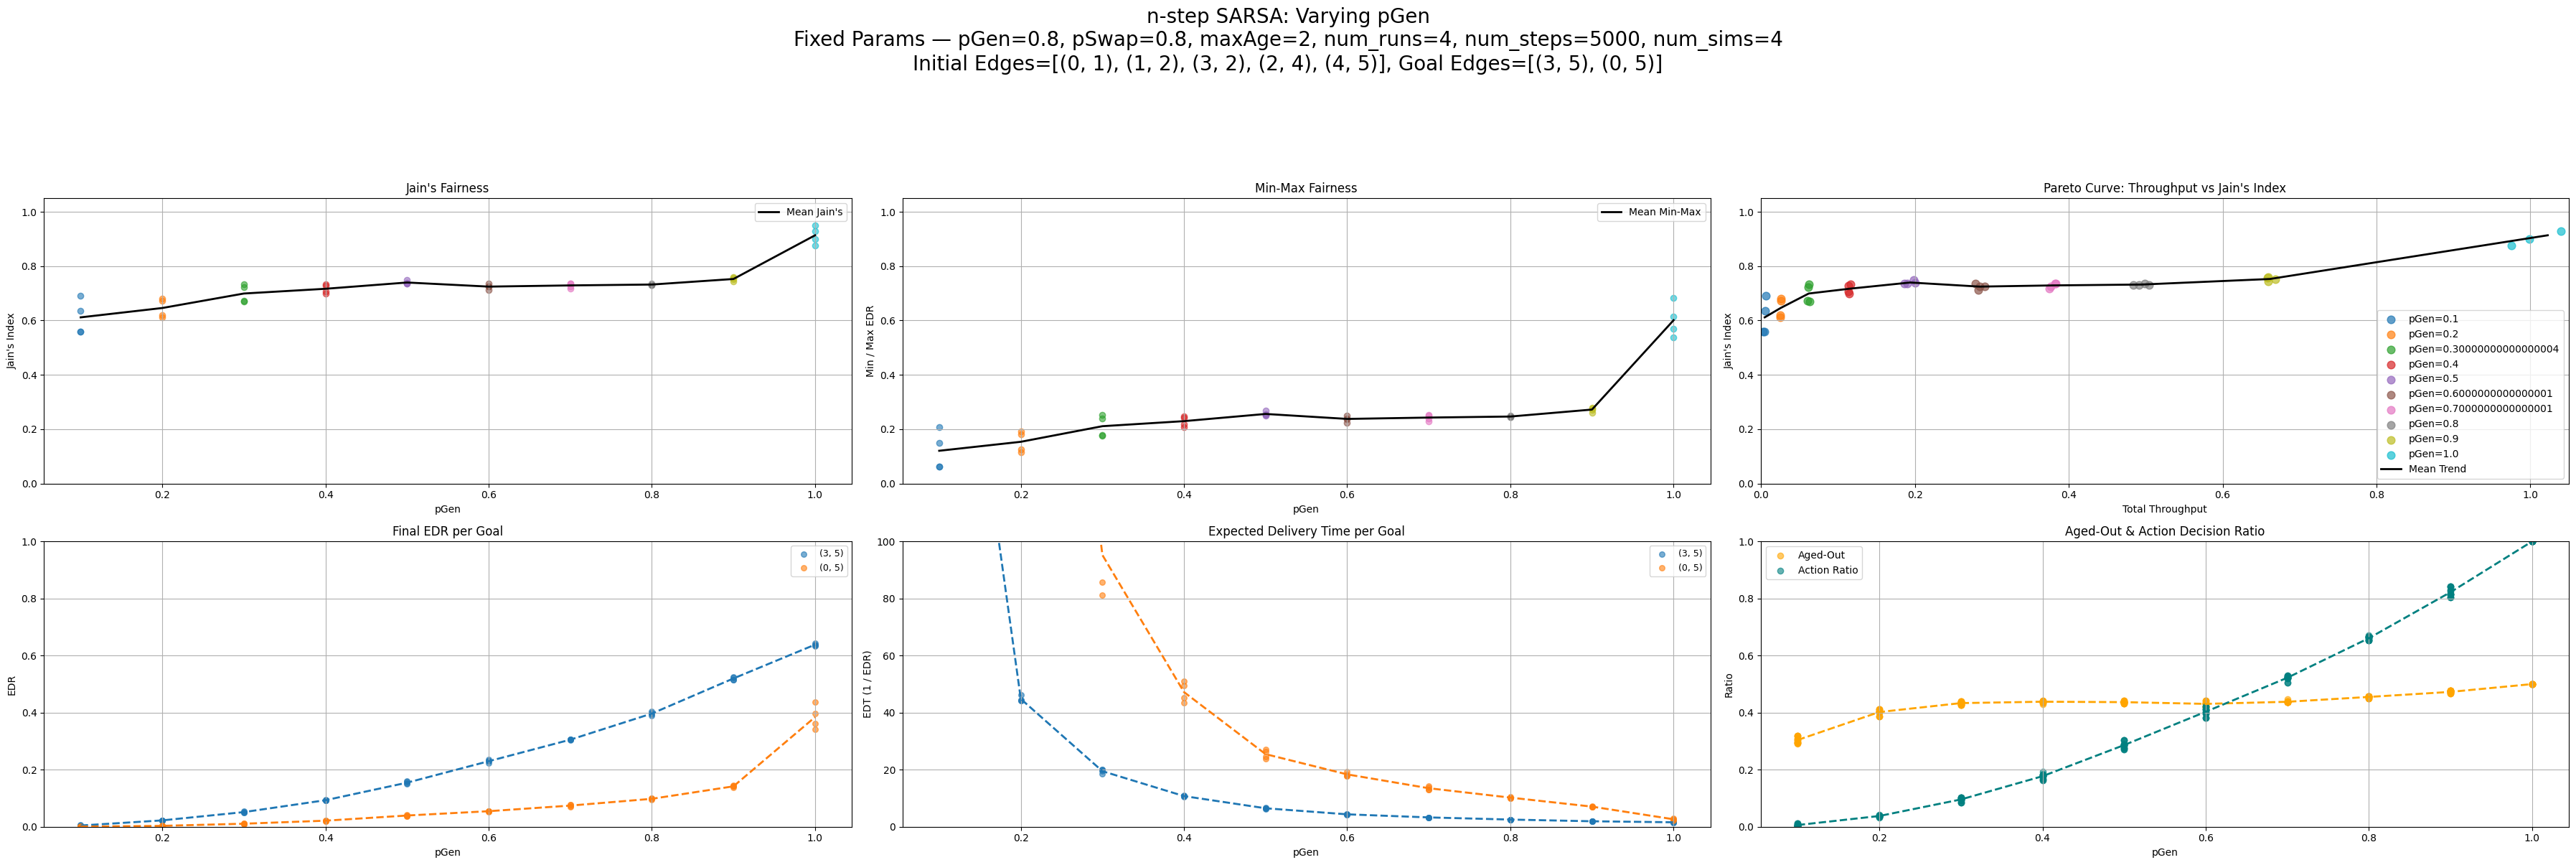

In [6]:
# Parameter sweep
param_name = 'pGen'  # or 'pGen'
bin_size = 0.05


param_values = [0.1 * i for i in range(1, 11)]
train_kwargs = {
    "totalSteps": 100000,
    "nLookahead": 8,
    "epsilon": 0.1,
    "gamma": 0.99,
    "alpha": 0.2,
}
# run_policy_experiments(
#     train_policy_fn=train_sarsa_policy,
#     policy_name="n-step SARSA",
#     edges=edges,
#     goal_edges=goalEdges,
#     p_gen=pGen,
#     p_swap=pSwap,
#     max_age=maxAge,
#     num_runs=5,
#     num_steps=100000,
#     num_simulations=5,
#     train_kwargs={},
#     validate_kwargs={},
#     plot=True
# )
    
# Run experiments across param values
results = compare_policies_across_param(
    policy_name="n-step SARSA",
    policy_train_fn=train_sarsa_policy,
    param_name=param_name,
    param_values=param_values,
    edges=edges,
    goal_edges=goalEdges,
    p_gen=pGen,
    p_swap=pSwap,
    max_age=maxAge,
    train_kwargs=train_kwargs,
    plot=True,
    num_runs=4,            # How many times to train a policy
    num_steps=5000,       # Steps per simulation
    num_simulations=4     # Simulations per trained policy
)